# Analisi grafiche con pandas
Pandas implementa diversi metodi per visualizzare i dati. Questi metodi si basano sulla libreria Matplotlib una libreria specifica di Python per la creazione di grafici.

I metodi di visualizzazione “puri” sono racchiusi all’interno del pacchetto plot, quindi dato un dataframe o una serie (colonna singola) si può fare `df.plot.[metodo]` dove metodo è il metodo che si vuole usare per creare la visualizzazione.

Ogni metodo, oltre ai parametri di Pandas può prendere in ingresso tutti i parametri di un grafico di Matplotlib.
Parametri utili sono:
*	title: una stringa che specifica il titolo del grafico;
*	xlabel: una stringa che specifica la label dell’asse x
*	ylabel: una stringa che specifica la label dell’asse y
*	figsize: una coppia di valori interi espressi come una tupla che specificano larghezza e altezza del grafico.
*	legend: una variabile booleana (True/False) che dice se mostrare o meno la legenda.

## Istogrammi
Un istogramma su dati numerici può essere creato con il metodo `df.plot.hist(by=[], bins=10)`
Dove
*	by (applicabile solo se si lavora su di un dataframe) specifica per quali colonne aggregare i dati
*	bins è un numero intero che specifica in quanti bin suddividere i dati.

Di default mostra in un unico grafico tutte le colonne, questo non è molto leggibile, si può quindi applicarlo su una singola colonna per volta, ad esempio



In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: title={'center': 'Distribuzione SepalLengthCm'}, xlabel='sepal_length', ylabel='Frequenza'>

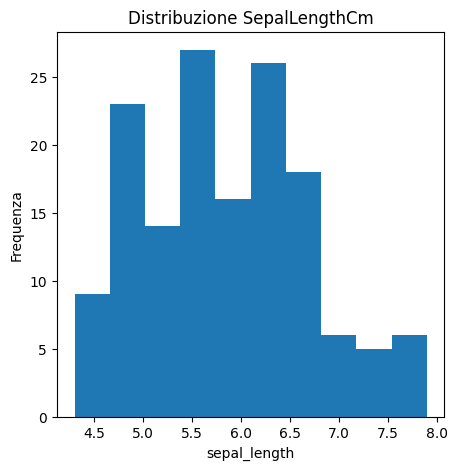

In [3]:
df['sepal_length'].plot.hist(bins=10, figsize=(5, 5), xlabel='sepal_length', ylabel='Frequenza', title="Distribuzione SepalLengthCm")

Possiamo vedere anche la distribuzione (usando by) rispetto alle diverse tipologie di iris presenti nel dataset

array([<Axes: title={'center': 'setosa'}, ylabel='Frequency'>,
       <Axes: title={'center': 'versicolor'}, ylabel='Frequency'>,
       <Axes: title={'center': 'virginica'}, ylabel='Frequency'>],
      dtype=object)

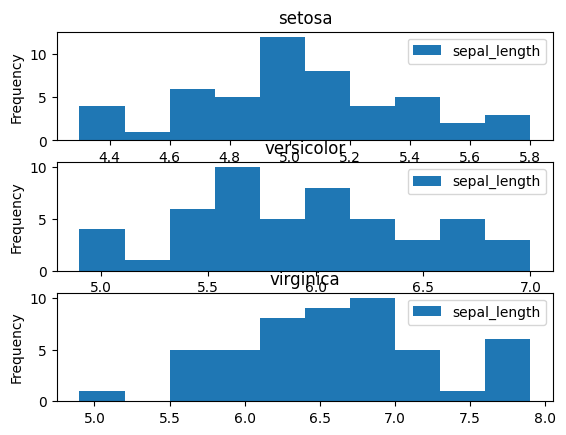

In [4]:
df[['species', 'sepal_length']].plot.hist(by='species')

Per gli istogrammi Pandas mette a disposizione anche il metodo dataframe.hist che rispetto a dataframe.plot.hist è di “più alto livello” e ha più opzioni. La sintassi è:
`DataFrame.hist(column=None, by=None, bins=10, backend=None, legend=False)`
Dove:
*	column specifica di quali colonne si vogliono gli istogrammi;
*	by specifica per quali colonne aggregare i dati;
*	bins è un numero intero che specifica in quanti bin suddividere i dati.

Sono presenti anche altri parametri visualizzabili nel manuale.


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

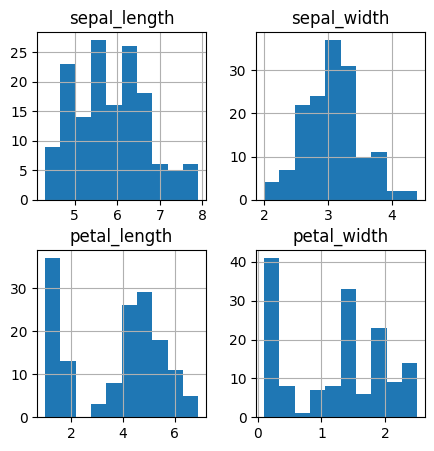

In [6]:
df.hist(figsize=(5, 5))

Possiamo vedere la distribuzione di alcune colonne sulla base di altre

array([[<Axes: title={'center': 'setosa'}>,
        <Axes: title={'center': 'versicolor'}>],
       [<Axes: title={'center': 'virginica'}>, <Axes: >]], dtype=object)

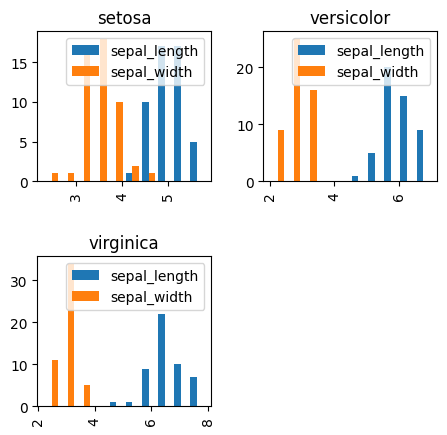

In [10]:
df.hist(column=['sepal_length', 'sepal_width'], figsize=(5, 5), by='species', legend=True)

## Grafici a barre
Grafici a barre possono essere generati con i metodi `dataframe.plot.bar(x=colonna, y=colonna)` e `dataframe.plot.barh(x=colonna, y=colonna)`.

Il primo visualizza un grafico a barre verticale, mentre il secondo un grafico a barre orizzontale.

x e y sono le colonne da visualizzare una su un’asse e una sull’altro, se omessi, visualizza tutti i campi numerici sull’asse y e l’indice sull’asse x.

Ad esempio, possiamo visualizzare i valori medi di lunghezza/larghezza dei sepali per tipologia di iris



<Axes: xlabel='species'>

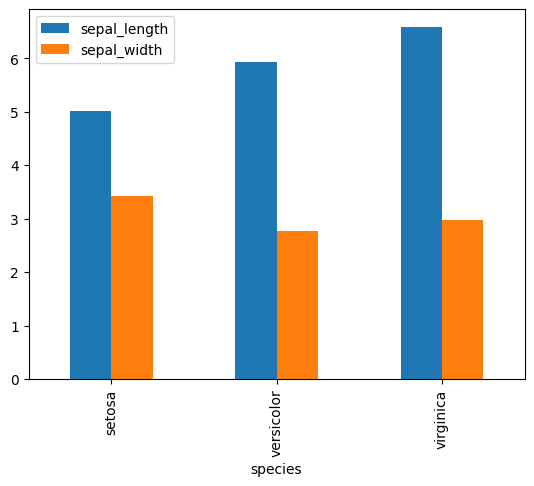

In [11]:
df[['species', 'sepal_length', 'sepal_width']].groupby('species').agg('mean').plot.bar()

<Axes: ylabel='species'>

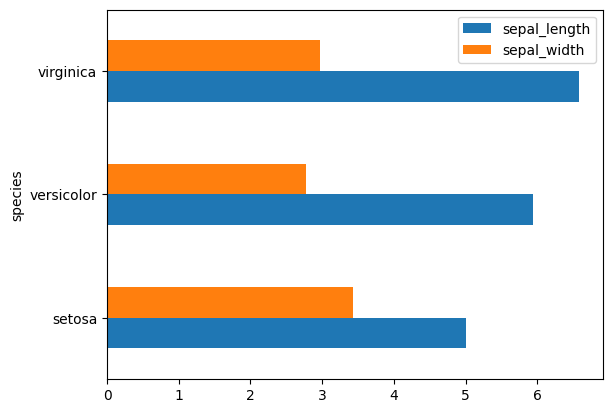

In [13]:
df[['species', 'sepal_length', 'sepal_width']].groupby('species').agg('mean').plot.barh()

Aggiungendo il parametro stacked=True si possono impilare le barre una sull’altra

<Axes: ylabel='species'>

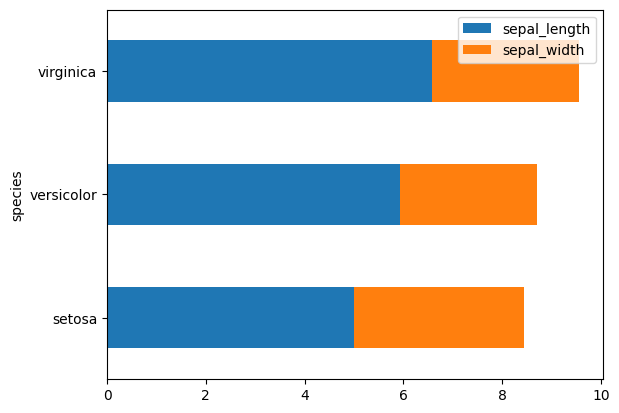

In [14]:
df[['species', 'sepal_length', 'sepal_width']].groupby('species').agg('mean').plot.barh(stacked=True)

Se si vogliono separare diversi attributi in grafici propri si può aggiungere il parametro subplots=True

array([<Axes: title={'center': 'sepal_length'}, ylabel='species'>,
       <Axes: title={'center': 'sepal_width'}, ylabel='species'>],
      dtype=object)

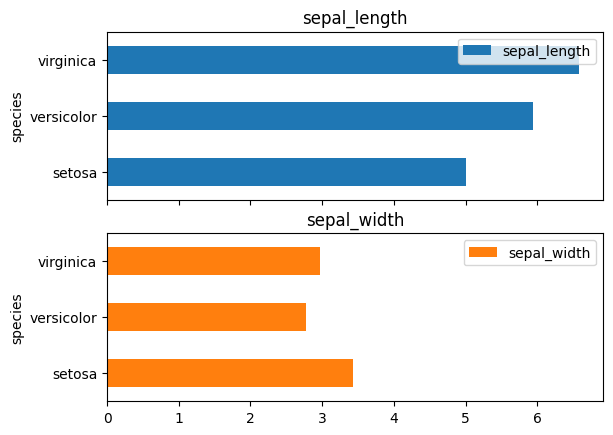

In [15]:
df[['species', 'sepal_length', 'sepal_width']].groupby('species').agg('mean').plot.barh(subplots=True)

Tramite il parametro color che prende in ingresso un dizionario dove le chiavi sono i nomi delle colonne e i valori i colori che si vogliono, è possibile personalizzare il colore delle barre.

<Axes: ylabel='species'>

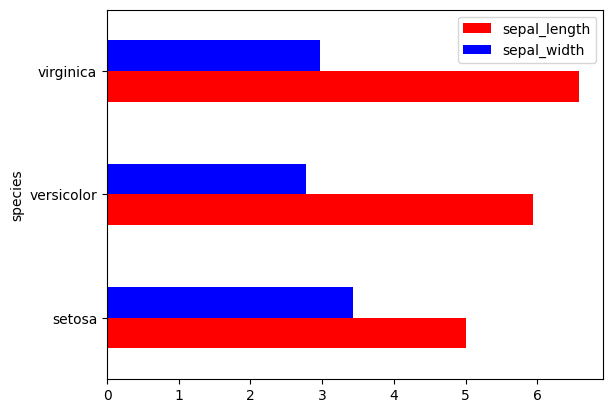

In [17]:
df[['species', 'sepal_length', 'sepal_width']].groupby('species').agg('mean').plot.barh(color={'sepal_length': 'red', 'sepal_width': 'blue'})